In [1]:
#!/bin/bash
!kaggle datasets download aslkuscu/telecust1000t

Dataset URL: https://www.kaggle.com/datasets/aslkuscu/telecust1000t
License(s): apache-2.0
  0% 0.00/10.3k [00:00<?, ?B/s]
100% 10.3k/10.3k [00:00<00:00, 10.0MB/s]


In [2]:
! unzip telecust1000t.zip -d /content/telecust_data

Archive:  telecust1000t.zip
  inflating: /content/telecust_data/teleCust1000t.csv  


In [3]:
import pandas as pd

df = pd.read_csv('/content/telecust_data/teleCust1000t.csv')

df.head() # Display first few rows to verify

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

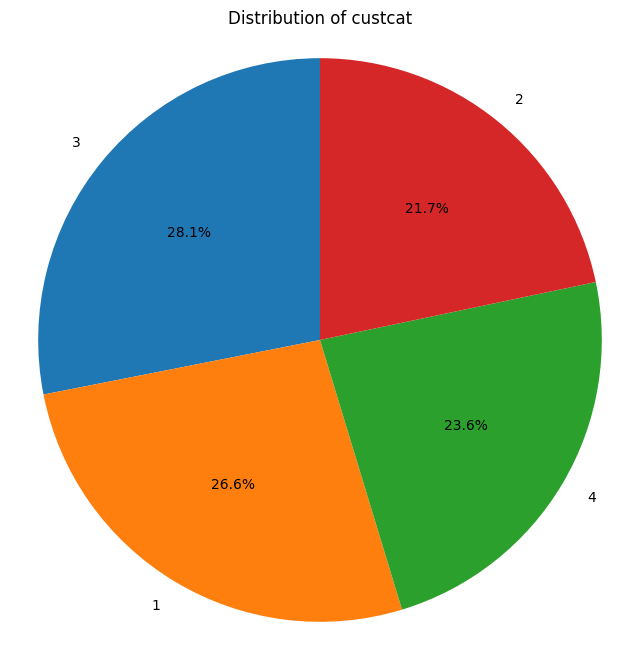

In [ ]:
import matplotlib.pyplot as plt
#creating  plot pie of the output
# Count the occurrences of each attrition flag
custcat_counts = df['custcat'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(custcat_counts, labels=custcat_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of custcat')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
'''# prompt: perform onehot encoding on the column 'custcat'

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is already loaded as in the previous code

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'custcat' column
encoded_custcat = encoder.fit_transform(df[['custcat']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_custcat, columns=encoder.get_feature_names_out(['custcat']))

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

df = df.drop('custcat', axis=1)

# Display the updated DataFrame (optional)
df.head()'''

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat_1,custcat_2,custcat_3,custcat_4
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1.0,0.0,0.0,0.0
1,3,11,33,1,7,136.0,5,5,0.0,0,6,0.0,0.0,0.0,1.0
2,3,68,52,1,24,116.0,1,29,0.0,1,2,0.0,0.0,1.0,0.0
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1.0,0.0,0.0,0.0
4,2,23,30,1,9,30.0,1,2,0.0,0,4,0.0,0.0,1.0,0.0


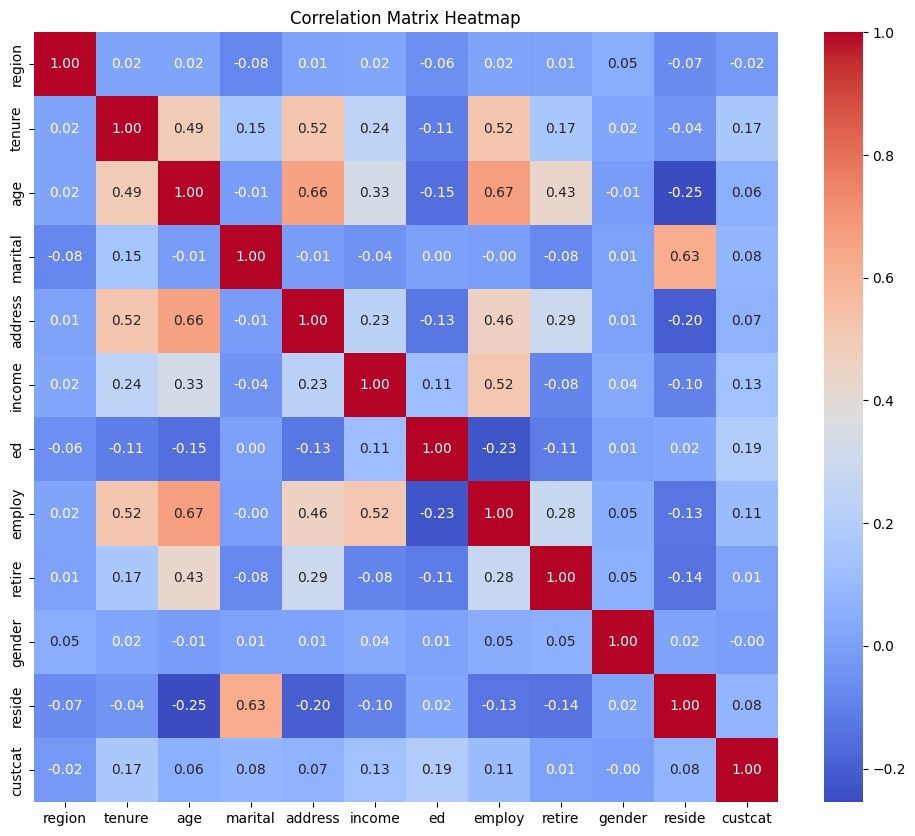

In [ ]:
import seaborn as sns

# Assuming 'df' is already defined as in the previous code

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Calculate the correlation between columns and 'chance of admit', then sort them in descending order
correlation_matrix = df.corr()['custcat'].sort_values(ascending=False)
correlation_matrix

,custcat
custcat,1.000000
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
retire,0.008908


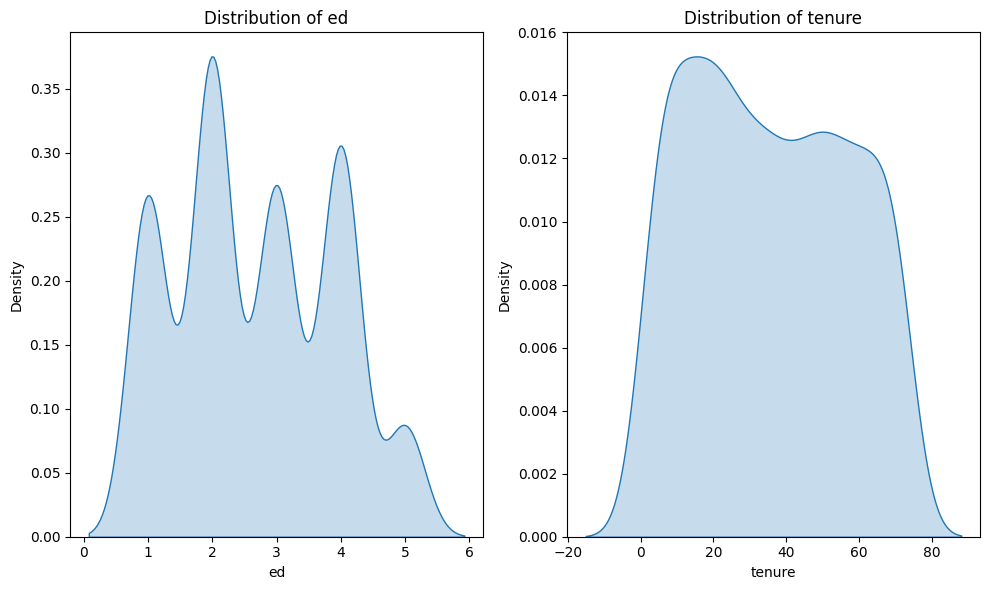

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(df['ed'], fill=True)  # Use kdeplot for Gaussian kernel density
plt.title('Distribution of ed')

plt.subplot(1, 2, 2)
sns.kdeplot(df['tenure'], fill=True)  # Use kdeplot for Gaussian kernel density
plt.title('Distribution of tenure')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('custcat', axis=1)
y = df['custcat']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (720, 11)
Validation data shape: (80, 11)
Testing data shape: (200, 11)


In [5]:
from sklearn.preprocessing import StandardScaler

# Create a MinMaxScaler object
scaler = StandardScaler()

# Transform the training, testing, and validation data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [6]:
import numpy as np

# Original dataset (X_train)
noise_factor = 0.01  # Adjust based on your data's scale
num_augmented_samples = 10  # Number of new noisy versions per sample

# Generate noisy versions
X_augmented = np.vstack([X_train + noise_factor * np.random.normal(size=X_train.shape) for _ in range(num_augmented_samples)])
y_augmented = np.tile(y_train, num_augmented_samples)

# Combine with original data
X_combined = np.vstack((X_train, X_augmented))
y_combined = np.hstack((y_train, y_augmented))

print(f"Original data size: {X_train.shape[0]}")
print(f"Augmented data size: {X_combined.shape[0]}")


Original data size: 720
Augmented data size: 7920


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical  # Import to_categorical


# Assuming X_train, y_train, X_val, y_val are defined from previous code

# Convert target variables to one-hot encoding
y_train = to_categorical(y_train-1, num_classes=4)
y_val = to_categorical(y_val-1, num_classes=4)
y_test = to_categorical(y_test-1, num_classes=4) # Added for consistency

In [ ]:
# one hidden layer network
model = Sequential()
model.add(Dense(11, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 11 neurons
model.add(Dense(4, activation='softmax'))  # Output layer (assuming 4 classes)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180 (720.00 B)

 Trainable params: 180 (720.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2570 - loss: 1.6552 - val_accuracy: 0.3875 - val_loss: 1.4651
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2509 - loss: 1.6366 - val_accuracy: 0.4000 - val_loss: 1.4448
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2342 - loss: 1.5971 - val_accuracy: 0.4125 - val_loss: 1.4276
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2620 - loss: 1.5773 - val_accuracy: 0.4000 - val_loss: 1.4130
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2664 - loss: 1.5330 - val_accuracy: 0.3625 - val_loss: 1.4007
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2834 - loss: 1.5009 - val_accuracy: 0.3625 - val_loss: 1.3914
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2802 - loss: 1.4981 - val_accuracy: 0.3750 - val_loss: 1.3827
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2907 - loss: 1.4787 - val_accuracy: 0.3500 - 

In [ ]:
from sklearn.metrics import r2_score

y_pred_1 = model.predict(X_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.044158419794722265

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.2942
Test Accuracy: 0.4000


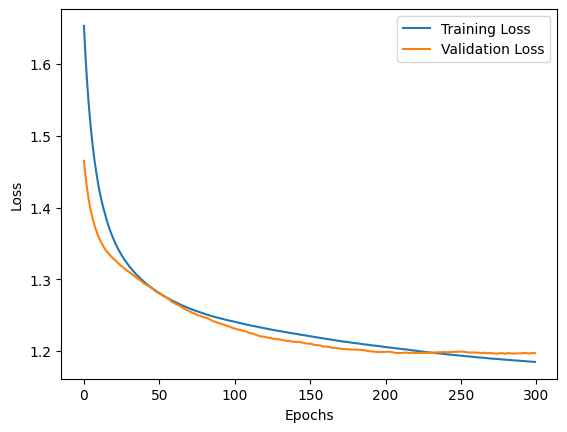

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# one hidden layer network
model1_2 = Sequential()
model1_2.add(Dense(55, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 11 neurons
model1_2.add(Dense(4, activation='softmax'))  # Output layer (assuming 4 classes)

model1_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 55)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 884 (3.45 KB)

 Trainable params: 884 (3.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history1_2 = model1_2.fit(X_train, y_train, epochs=500, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2421 - loss: 1.6020 - val_accuracy: 0.2500 - val_loss: 1.6033
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2556 - loss: 1.5595 - val_accuracy: 0.2500 - val_loss: 1.5829
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2700 - loss: 1.5561 - val_accuracy: 0.2625 - val_loss: 1.5664
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2422 - loss: 1.5309 - val_accuracy: 0.2625 - val_loss: 1.5499
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2667 - loss: 1.5007 - val_accuracy: 0.2750 - val_loss: 1.5359
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2639 - loss: 1.4885 - val_accuracy: 0.2750 - val_loss: 1.5239
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2574 - loss: 1.4894 - val_accuracy: 0.2750 - val_loss: 1.5140
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2555 - loss: 1.4567 - val_accuracy: 0.2750 - val_loss: 1.5047

In [ ]:
loss1_2, accuracy1_2 = model1_2.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss1_2:.4f}")
print(f"Test Accuracy: {accuracy1_2:.4f}")

Test Loss: 1.2972
Test Accuracy: 0.4400


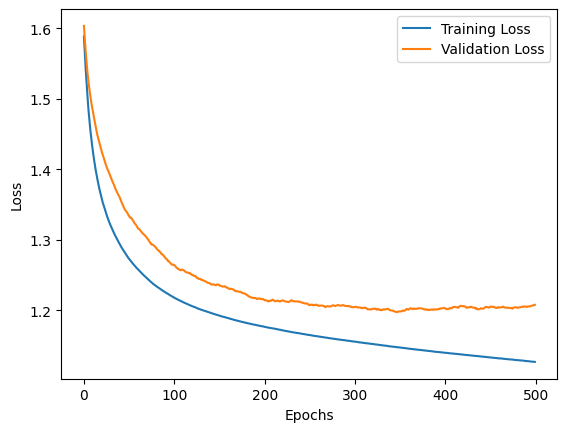

In [ ]:
# Plot the training and validation loss
plt.plot(history1_2.history['loss'], label='train')   # Training loss
plt.plot(history1_2.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 8)                   │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484 (1.89 KB)

 Trainable params: 484 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2579 - loss: 1.4639 - val_accuracy: 0.1750 - val_loss: 1.5394
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2640 - loss: 1.4370 - val_accuracy: 0.1500 - val_loss: 1.5253
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2737 - loss: 1.4116 - val_accuracy: 0.1625 - val_loss: 1.5140
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2947 - loss: 1.4171 - val_accuracy: 0.1875 - val_loss: 1.5054
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2821 - loss: 1.4114 - val_accuracy: 0.1875 - val_loss: 1.4969
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2819 - loss: 1.4027 - val_accuracy: 0.1875 - val_loss: 1.4892
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2760 - loss: 1.4029 - val_accuracy: 0.1750 - val_loss: 1.4827
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2843 - loss: 1.3961 - val_accuracy: 0.1875 - 

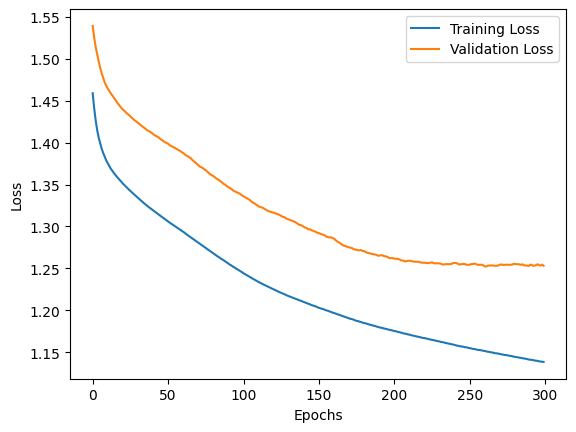

In [ ]:
from tensorflow.keras.layers import  Dropout, BatchNormalization

# one hidden layer network
model2 = Sequential()
model2.add(Dense(22, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 11 neurons
model2.add(Dense(8, activation='relu'))
model2.add(Dense(4, activation='softmax'))  # Output layer (assuming 4 classes)

model2.summary()

model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_val, y_val))


y_pred_2 = model2.predict(X_test)
rscore_2 = r2_score(y_test, y_pred_1)

rscore_2

loss2, accuracy2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss2:.4f}")
print(f"Test Accuracy: {accuracy2:.4f}")

# Plot the training and validation loss
plt.plot(history2.history['loss'], label='train')   # Training loss
plt.plot(history2.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 22)                  │              88 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 22)                  │             506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 8)                   │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,182 (4.62 KB)

 Trainable params: 1,122 (4.38 KB)

 Non-trainable params: 60 (240.00 B)

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2328 - loss: 1.6540 - val_accuracy: 0.2375 - val_loss: 1.4111
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2183 - loss: 1.5766 - val_accuracy: 0.2500 - val_loss: 1.3875
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2519 - loss: 1.4746 - val_accuracy: 0.3000 - val_loss: 1.3679
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2604 - loss: 1.4721 - val_accuracy: 0.3000 - val_loss: 1.3504
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2747 - loss: 1.4293 - val_accuracy: 0.3500 - val_loss: 1.3353
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2693 - loss: 1.3954 - val_accuracy: 0.3375 - val_loss: 1.3224
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3018 - loss: 1.3516 - val_accuracy: 0.3750 - val_loss: 1.3098
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3141 - loss: 1.3573 - val_accuracy: 0.3625 - 

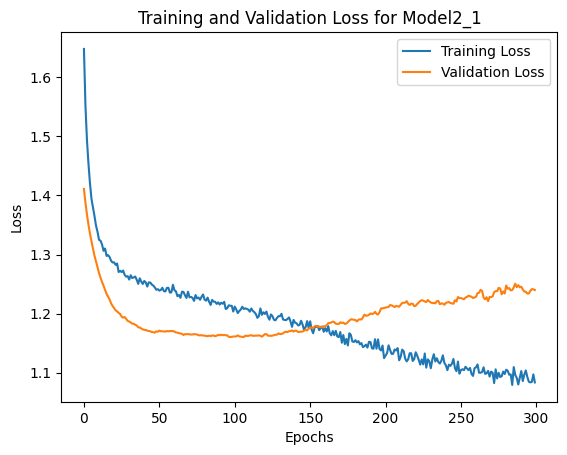

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# One hidden layer network with Batch Normalization
model2_1 = Sequential()

# Input layer with Batch Normalization
model2_1.add(Dense(22, activation=None, input_shape=(X_train.shape[1],)))  # No activation yet
model2_1.add(BatchNormalization())
model2_1.add(Dense(22, activation='relu'))  # Apply activation after Batch Norm

# Hidden layer with Batch Normalization
model2_1.add(Dense(8, activation=None))  # No activation yet
model2_1.add(BatchNormalization())
model2_1.add(Dense(8, activation='relu'))  # Apply activation after Batch Norm

# Output layer
model2_1.add(Dense(4, activation='softmax'))  # Output layer for 4-class classification

# Model summary
model2_1.summary()

# Compile the model
model2_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2_1 = model2_1.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_val, y_val))

# Predict and evaluate
y_pred_2_1 = model2_1.predict(X_test)
rscore_2_1 = r2_score(y_test, y_pred_2_1)

print(f"R2 Score: {rscore_2_1:.4f}")
loss2_1, accuracy2_1 = model2_1.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss2_1:.4f}")
print(f"Test Accuracy: {accuracy2_1:.4f}")

# Plot the training and validation loss
plt.plot(history2_1.history['loss'], label='train')   # Training loss
plt.plot(history2_1.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Model2_1")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22)                  │              88 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 22)                  │             506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 8)                   │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,182 (4.62 KB)

 Trainable params: 1,122 (4.38 KB)

 Non-trainable params: 60 (240.00 B)

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2580 - loss: 1.6428 - val_accuracy: 0.3000 - val_loss: 1.4239
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2794 - loss: 1.5900 - val_accuracy: 0.3250 - val_loss: 1.3996
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2760 - loss: 1.5456 - val_accuracy: 0.3500 - val_loss: 1.3790
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2473 - loss: 1.5598 - val_accuracy: 0.3625 - val_loss: 1.3649
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2632 - loss: 1.4936 - val_accuracy: 0.3750 - val_loss: 1.3507
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2693 - loss: 1.4846 - val_accuracy: 0.4125 - val_loss: 1.3408
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2538 - loss: 1.4316 - val_accuracy: 0.4125 - val_loss: 1.3324
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2940 - loss: 1.4324 - val_accuracy: 0.4250 - 

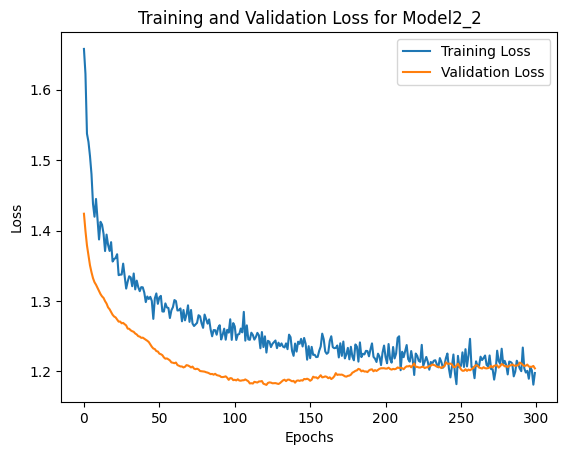

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# One hidden layer network with Batch Normalization and Dropout
model2_2 = Sequential()

# Input layer with Batch Normalization and Dropout
model2_2.add(Dense(22, activation=None, input_shape=(X_train.shape[1],)))  # No activation yet
model2_2.add(BatchNormalization())
model2_2.add(Dense(22, activation='relu'))  # Apply activation after Batch Norm
model2_2.add(Dropout(0.2))  # Dropout with rate 0.2

# Hidden layer with Batch Normalization and Dropout
model2_2.add(Dense(8, activation=None))  # No activation yet
model2_2.add(BatchNormalization())
model2_2.add(Dense(8, activation='relu'))  # Apply activation after Batch Norm
model2_2.add(Dropout(0.2))  # Dropout with rate 0.2

# Output layer
model2_2.add(Dense(4, activation='softmax'))  # Output layer for 4-class classification

# Model summary
model2_2.summary()

# Compile the model
model2_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2_2 = model2_2.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_val, y_val))

# Predict and evaluate
y_pred_2_2 = model2_2.predict(X_test)
rscore_2_2 = r2_score(y_test, y_pred_2_2)

print(f"R2 Score: {rscore_2_2:.4f}")
loss2_2, accuracy2_2 = model2_2.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss2_2:.4f}")
print(f"Test Accuracy: {accuracy2_2:.4f}")

# Plot the training and validation loss
plt.plot(history2_2.history['loss'], label='train')   # Training loss
plt.plot(history2_2.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Model2_2")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22)                  │              88 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 22)                  │             506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,182 (4.62 KB)

 Trainable params: 1,122 (4.38 KB)

 Non-trainable params: 60 (240.00 B)

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2617 - loss: 1.7269 - val_accuracy: 0.2625 - val_loss: 1.5277
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2261 - loss: 1.6314 - val_accuracy: 0.3000 - val_loss: 1.4624
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2797 - loss: 1.5245 - val_accuracy: 0.3000 - val_loss: 1.4224
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2717 - loss: 1.5157 - val_accuracy: 0.3250 - val_loss: 1.4037
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2371 - loss: 1.4901 - val_accuracy: 0.3625 - val_loss: 1.3835
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3028 - loss: 1.4100 - val_accuracy: 0.3250 - val_loss: 1.3735
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2762 - loss: 1.4094 - val_accuracy: 0.3375 - val_loss: 1.3693
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3020 - loss: 1.4201 - val_accuracy: 0.3375 - 

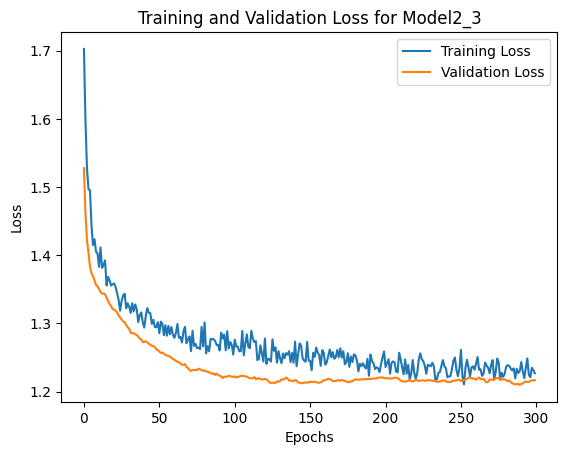

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# One hidden layer network with Batch Normalization, Dropout, and L2 Regularization
model2_3 = Sequential()

# Input layer with Batch Normalization, Dropout, and L2 Regularization
model2_3.add(Dense(22, activation=None, input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)))  # No activation yet
model2_3.add(BatchNormalization())
model2_3.add(Dense(22, activation='relu', kernel_regularizer=l2(0.0001)))  # Apply activation after Batch Norm
model2_3.add(Dropout(0.2))  # Dropout with rate 0.2

# Hidden layer with Batch Normalization, Dropout, and L2 Regularization
model2_3.add(Dense(8, activation=None, kernel_regularizer=l2(0.0001)))  # No activation yet
model2_3.add(BatchNormalization())
model2_3.add(Dense(8, activation='relu', kernel_regularizer=l2(0.0001)))  # Apply activation after Batch Norm
model2_3.add(Dropout(0.2))  # Dropout with rate 0.2

# Output layer with L2 Regularization
model2_3.add(Dense(4, activation='softmax', kernel_regularizer=l2(0.0001)))  # Output layer for 4-class classification

# Model summary
model2_3.summary()

# Compile the model
model2_3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2_3 = model2_3.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_val, y_val))

# Predict and evaluate
y_pred_2_3 = model2_3.predict(X_test)
rscore_2_3 = r2_score(y_test, y_pred_2_3)

print(f"R2 Score: {rscore_2_3:.4f}")
loss2_3, accuracy2_3 = model2_3.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss2_3:.4f}")
print(f"Test Accuracy: {accuracy2_3:.4f}")

# Plot the training and validation loss
plt.plot(history2_3.history['loss'], label='train')   # Training loss
plt.plot(history2_3.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Model2_3")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_83 (Dense)                     │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 8)                   │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484 (1.89 KB)

 Trainable params: 484 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2825 - loss: 1.3789 - val_accuracy: 0.3250 - val_loss: 1.3800
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3193 - loss: 1.3576 - val_accuracy: 0.3625 - val_loss: 1.3719
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3435 - loss: 1.3525 - val_accuracy: 0.4000 - val_loss: 1.3664
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3391 - loss: 1.3452 - val_accuracy: 0.4000 - val_loss: 1.3636
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3945 - loss: 1.3161 - val_accuracy: 0.4000 - val_loss: 1.3602
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3820 - loss: 1.3170 - val_accuracy: 0.3750 - val_loss: 1.3571
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4036 - loss: 1.3217 - val_accuracy: 0.3625 - val_loss: 1.3541
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4169 - loss: 1.2971 - val_accuracy: 0.3750 - 

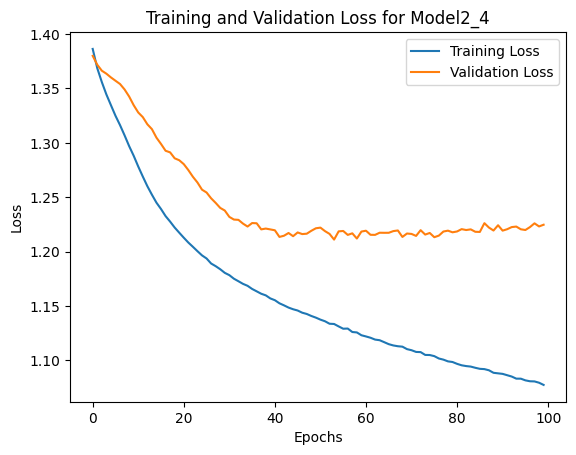

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# One hidden layer network with Adam optimizer
model2_4 = Sequential()

# Input layer
model2_4.add(Dense(22, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 11 neurons

# Hidden layer
model2_4.add(Dense(8, activation='relu'))

# Output layer
model2_4.add(Dense(4, activation='softmax'))  # Output layer for 4-class classification

# Model summary
model2_4.summary()

# Compile the model with Adam optimizer
model2_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2_4 = model2_4.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val))

# Predict and evaluate
y_pred_2_4 = model2_4.predict(X_test)
rscore_2_4 = r2_score(y_test, y_pred_2_4)

print(f"R2 Score: {rscore_2_4:.4f}")
loss2_4, accuracy2_4 = model2_4.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss2_4:.4f}")
print(f"Test Accuracy: {accuracy2_4:.4f}")

# Plot the training and validation loss
plt.plot(history2_4.history['loss'], label='train')   # Training loss
plt.plot(history2_4.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Model2_4")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484 (1.89 KB)

 Trainable params: 484 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2010 - loss: 1.5853 - val_accuracy: 0.2875 - val_loss: 1.4975
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2517 - loss: 1.4985 - val_accuracy: 0.2875 - val_loss: 1.4541
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2440 - loss: 1.4395 - val_accuracy: 0.2875 - val_loss: 1.4271
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2651 - loss: 1.4160 - val_accuracy: 0.2750 - val_loss: 1.4108
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2448 - loss: 1.4050 - val_accuracy: 0.2750 - val_loss: 1.4006
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2923 - loss: 1.3813 - val_accuracy: 0.3250 - val_loss: 1.3939
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2742 - loss: 1.3947 - val_accuracy: 0.3625 - val_loss: 1.3866
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3265 - loss: 1.3619 - val_accuracy: 0.3250 - 

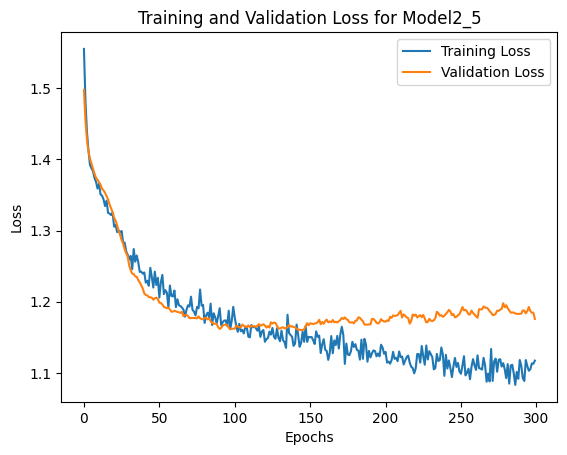

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# One hidden layer network with Adam optimizer
model2_5 = Sequential()

# Input layer
model2_5.add(Dense(22, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)))  # Input layer with 11 neurons
model2_5.add(Dropout(0.1))
# Hidden layer
model2_5.add(Dense(8, activation='relu', kernel_regularizer=l2(0.0001)))
model2_5.add(Dropout(0.1))
# Output layer
model2_5.add(Dense(4, activation='softmax', kernel_regularizer=l2(0.0001)))  # Output layer for 4-class classification

# Model summary
model2_5.summary()


# Compile the model with Adam optimizer
model2_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2_5 = model2_5.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_val, y_val))

# Predict and evaluate
y_pred_2_5 = model2_5.predict(X_test)
rscore_2_5 = r2_score(y_test, y_pred_2_5)

print(f"R2 Score: {rscore_2_5:.4f}")
loss2_5, accuracy2_5 = model2_5.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss2_5:.4f}")
print(f"Test Accuracy: {accuracy2_5:.4f}")

# Plot the training and validation loss
plt.plot(history2_5.history['loss'], label='train')   # Training loss
plt.plot(history2_5.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Model2_5")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484 (1.89 KB)

 Trainable params: 484 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2593 - loss: 1.6057 - val_accuracy: 0.2875 - val_loss: 1.5866
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2972 - loss: 1.5239 - val_accuracy: 0.3000 - val_loss: 1.5303
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2346 - loss: 1.5273 - val_accuracy: 0.2750 - val_loss: 1.4944
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3012 - loss: 1.4768 - val_accuracy: 0.3000 - val_loss: 1.4663
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2952 - loss: 1.4154 - val_accuracy: 0.3125 - val_loss: 1.4438
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3128 - loss: 1.3973 - val_accuracy: 0.3375 - val_loss: 1.4276
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3441 - loss: 1.4080 - val_accuracy: 0.3250 - val_loss: 1.4164
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3759 - loss: 1.3618 - val_accuracy: 0.3125 - 

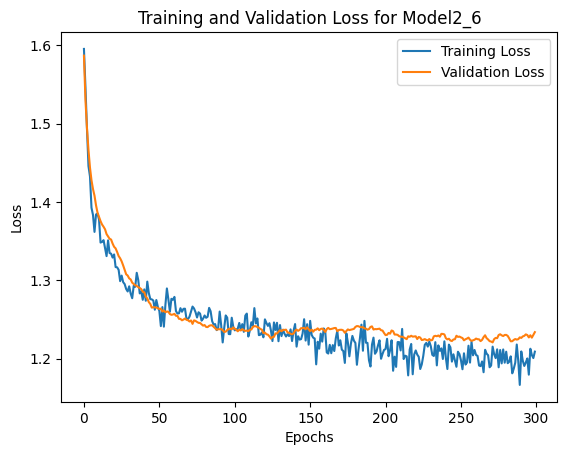

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# One hidden layer network with RMSprop optimizer
model2_6 = Sequential()

# Input layer
model2_6.add(Dense(22, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)))  # Input layer with L2 regularization
model2_6.add(Dropout(0.3))

# Hidden layer
model2_6.add(Dense(8, activation='relu', kernel_regularizer=l2(0.0001)))
model2_6.add(Dropout(0.3))

# Output layer
model2_6.add(Dense(4, activation='softmax', kernel_regularizer=l2(0.0001)))  # Output layer for 4-class classification

# Model summary
model2_6.summary()

# Compile the model with RMSprop optimizer
model2_6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2_6 = model2_6.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_val, y_val))

# Predict and evaluate
y_pred_2_6 = model2_6.predict(X_test)
rscore_2_6 = r2_score(y_test, y_pred_2_6)

print(f"R2 Score: {rscore_2_6:.4f}")
loss2_6, accuracy2_6 = model2_6.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss2_6:.4f}")
print(f"Test Accuracy: {accuracy2_6:.4f}")

# Plot the training and validation loss
plt.plot(history2_6.history['loss'], label='train')   # Training loss
plt.plot(history2_6.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Model2_6")
plt.show()
